<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 3: Large Margin Classifiers</H2>

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
| 26th February 2019  | **  Monday 11th March ** |


This workshop is worth 30% of the total module mark.


Candidate number:  <font color="red">*660031764*</font>


Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
</div>


# Large margin classifiers and support vector machines

The aim of this workshop is to write and test code for a nonlinear support vector machine.  It builds on and repeats some of the last workshop and is done in stages:

1. You will do a couple of exercises to familiarise yourself with constrained optimisation and the Lagrangian dual formulation.
1. Initially, you will write a linear large margin classifier for linearly separable data.
1. The next stage is to modify this code, which uses a *hard margin* to a soft margin.
1.  Finally, you will use the *kernel trick* to map the data to a high-dimensional feature space, while calculating the necessary inner-products in the original data space.

At each stage, you should test your code on the provided data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from random import randint
plt.rcParams['figure.figsize'] = [10, 5]


## Part 1. Constrained optimisation with equality constraints

To begin with we will solve an optimisation problem with equality constraints.  The problem is defined for a two-dimensional $\mathbf{x} = (x_1, x_2)^T$ as follows:
\begin{align*}
    \mbox{min}_\mathbf{x} ~~ f(\mathbf{x}) &= x_1^2+ 3x_2^2\\
    \text{such that}\qquad & x_1 + x_2 = 1
\end{align*}

In this part, you will be asked to solve the problem "by hand", using markdown cells to explain your steps. 

To see what is going on, make a contour plot of $f(\mathbf{x})$ and draw the contraint line on it.  The following code will draw the contour.  You should add the constraint line. 

You should be able to approximately read the value and location of the contrained minimum from your plot.

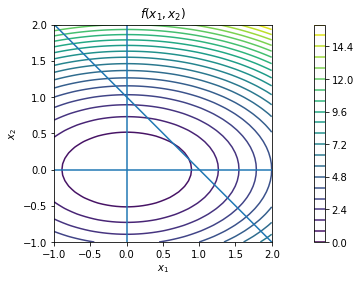

In [2]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
    return x*x + 3*y*y

x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$f(x_1,x_2)$')
plt.axvline(0.0)
#plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 25)
plt.colorbar()
plt.axis('scaled')
plt.plot(x,1-x)

Here we draw the contraint line $x_2 = 1 - x_1$. We observe that there is a minimum contour that satisfies this constraint, where the first contour line is intercepted by the contraint line at roughly $[x_1,x_2]=[\frac{3}{4},\frac{1}{4}]$.

<b>1.1)</b>
Write the contraint in standard form $h(\mathbf{x}) = 0$ and therefore write down the Lagrangian, $L(\mathbf{x}, \mathbf{\nu})$.  You could do this and the following cells on a piece of paper, but it's not too hard to put it into LaTeX for posterity.
<div style="text-align: right"><b>[4 marks]</b></div>

$h(\mathbf{x}) = 1 - x_1 - x_2 = 0$

$L(\mathbf{x}, \mathbf{\nu}) = f(\mathbf{x}) + {\sum_{i=1}^p\nu_i h(\mathbf{x}}) = 0$

Where: $f(\mathbf{x}) = x_1^2+ 3x_2^2$, $h(\mathbf{x}) = 1 - x_1 - x_2$, and $p = 1$ and $\mathbf{\nu} = [\nu_1]$

So, $L(x_1, x_2, \nu_1) = x_1^2 + 3x_2^2 + \nu_1(1-x_1-x_2)$

<b>1.2)</b>
First, minimise the unconstrained minimisation problem by minimising $L(\mathbf{x}, \nu)$ with respect to $\mathbf{x}$ and $\nu$.  This is done by setting the partial derivatives with respect to $x_1$, $x_2$ and $\nu$ to zero and solving for $x_1$, $x_2$ and $\nu$.
<div style="text-align: right"><b>[5 marks]</b></div>

$L(x_1, x_2, \nu_1) = x_1^2 + 3x_2^2 + \nu_1(1-x_1-x_2)$

Hence we find the following partial differential equations:

$\frac{\partial L}{\partial x_1} = 2x_1 - \nu_1 = 0$

$\frac{\partial L}{\partial x_2} = 6x_2 - \nu_1 = 0$

$\frac{\partial L}{\partial \nu_1} = 1 - x_1 - x_2 = 0$

So solving these simultaneous equations we obtain:

$\nu_1 = \frac{3}{2}, x_1 = \frac{3}{4}, x_2 = \frac{1}{4}$

<b>1.3)</b> 
Plot the minimising point on your contour plot and verify that agrees with  the constraint and the function value at the constrained minimum.
<div style="text-align: right"><b>[2 marks]</b></div>

So the minimising point is $[x_1,x_2]=[\frac{3}{4},\frac{1}{4}]$. 

We verify this agrees with the constraint:

$h(\mathbf{x}) = 1 - x_1 - x_2 = 1 - \frac{3}{4} - \frac{1}{4} = 0$

We also plot the point on our graph:

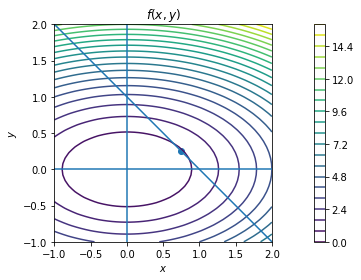

In [3]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
    return x*x + 3*y*y

x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
#plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 25)
plt.colorbar()
plt.axis('scaled')
plt.plot(x,1-x)
plt.scatter(0.75,0.25)

We can visually verify that the point is on the constraint line.

We can also observe that the point is at the minimum of the function $f(\mathbf{x}) = x_1^2+ 3x_2^2$, as the constraint is tangent to the contour and intercepts at the point $[x_1,x_2]=[\frac{3}{4},\frac{1}{4}]$. 

<b>1.4)</b>
Now we will solve the problem again, but this time by finding the Lagrangian dual function, which we will maximise to find the optimal dual variable $\nu$ and thus the optimal $\mathbf{x}$.

By setting the derivative of the Largrangian with respect to $\mathbf{x}$ to zero, find the Largrangian dual function $g(\nu)$. 
<div style="text-align: right"><b>[5 marks]</b></div>

$\begin{align*}
    g(\nu) = \mbox{min}_\mathbf{x} ~~[x_1^2+ 3x_2^2 +\nu_1(1-x_1-x_2)]\\
\end{align*}$

So we again minimise $[x_1^2+ 3x_2^2 +\nu_1(1-x_1-x_2)]$

$\frac{\partial [x_1^2+ 3x_2^2 +\nu_1(1-x_1-x_2)]}{\partial x_1} = 2x_1 - \nu_1 = 0$

$\frac{\partial [x_1^2+ 3x_2^2 +\nu_1(1-x_1-x_2)]}{\partial x_2} = 6x_2 - \nu_1 = 0$

So $x_1 = \frac{\nu_1}{2}$ and $x_2 = \frac{\nu_1}{6}$.

Substituting in, we get find the Lagrangian dual function $g(\mathbf{\nu})$:

$g(\mathbf{\nu}) = -\frac{\nu_1^2}{3} + \nu_1$

<b>1.5)</b>
Maximise $g(\nu)$ with respect to $\nu$ and so find the optimal dual variable $\nu^\star$ and thus $g(\nu^\star)$.
<div style="text-align: right"><b>[5 marks]</b></div>

We differentiate with respect to $\nu$:

$g'(\nu^\star) = -\frac{-2\nu^\star}{3} + 1 = 0$

So $\nu^\star = \frac{3}{2}$

Thus $g(\nu^\star) = \frac{3}{4}$

<b>1.6)</b>
Use the relations you derived when finding the Lagrangian dual function to get $\mathbf{x}^\star$ from $\nu^\star$.  Thus find $f(\mathbf{x}^\star)$ and verify that it equals $g(\nu^\star)$.

<div style="text-align: right"><b>[4 marks]</b></div>

From the relations we derived when finding the Lagrangian dual function:

$x_1 = \frac{\nu_1}{2}$,
$x_2 = \frac{\nu_1}{6}$,
where $\nu_1 = \frac{3}{2}$


$f(\mathbf{x}) = x_1^2+ 3x_2^2 = \frac{3}{4}^2 + 3\times\frac{1}{4}^2 = \frac{3}{4}$

Thus $g(\nu^\star) = f(\mathbf{x}^\star) = x_1^2+ 3x_2^2 = \frac{3}{4}^2 + 3\times\frac{1}{4}^2 = \frac{3}{4}$

## Part 2. Quadratic programming

At the heart of the dual formulation of the large margin classifier (LMC) is the quadratic programme with constraints.  For example, for the hard LMC the dual Lagrange function to be *maximised* is:
\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}
      
There are a number of quadratic progamming functions that you could use, but I recommend that you use those from [cvxopt](http://cvxopt.org/).  On the workshop machines you should be able to import the module with:

    import cvxopt
    
If you want to use `cvxopt` on your own machine then you can install it from a shell with `conda`

    conda install cvxopt

## `cvxopt` example

Here is an example of solving a constrained quadratic program (QP) with `cvxopt`. This is largely copied from https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf

The standard form for a QP in `cvxopt` notation is:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^T P x &+ q^T x \\
        \text{such that   }\quad  Gx &\preceq h\\
        Ax & = b
\end{align*}
where $Gx \preceq h$ means that the inequality is taken element-wise for each row of $Gx$ and $h$.

In `cvxopt` the QP is defined by the parameters $P, q, G, h, A$ and $b$.  The matrix $P$ and the vector $q$ must be specified, but the others are optional.   Note that all optimisations must be manipulated to be of this form.  In particular, note that you will want to *maximise* the Lagrangian dual $g(\mathbf{\alpha})$, so you will have to write the maximisation as the minimisation of $-g(\mathbf{\alpha})$.

Here is a simple example:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^2 + & 3x + 4y\\
        \text{such that   }\quad x, y & \ge 0\\
        x + 3y & \ge 15\\
        2x + 5y & \le 100\\
        3x + 4y & \le 80
\end{align*}


Evaluate the objective function on a grid covering the range $[-5, 20] \times [-5, 20]$ and so plot contours of the objective function.  Augment your plot with lines showing the inequalities and so, by eye, find the minimum of the objective function. 

(If you want to be fancy -- not necessary -- you could use the [fillplots](https://github.com/tkf/fillplots) module to plot the region defined by the inequalities.)

The problem can be written in standard form as:

\begin{align*}
  \min_{x, y} \tfrac{1}{2}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}^T
  \begin{bmatrix}
    1 & 0\\
    0 & 0
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}
  +
   \begin{bmatrix}
    3 \\ 4
  \end{bmatrix}^T
 \begin{bmatrix}
    x \\ y
  \end{bmatrix}\\
  \begin{bmatrix}
    -1 & 0\\
    0 & -1\\
    -1 & -3\\
    2 & 5\\
    3 & 4
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}  
  \preceq
  \begin{bmatrix}
    0 \\ 0 \\ -15 \\ 100 \\ 80
  \end{bmatrix}
\end{align*}

Note that all the inequality constraints have been gathered into the matrix $G$ and that since there are no equality constraints $A$ and $b$ do not need to be specified.  Note
that even though $y^2$ did not appear in the original objective, we had to include it with zero coefficients in P because the solver parameters must be defined using the full set of variables.  Even if certain variables only appear in constraints, they will still need to be expressed with zero coefficients in the objective parameters, and *vice versa*.

<div style="text-align: right"><b>[5 marks]</b></div>

Matrices specifying the QP to  `cxvopt` are defined using the `cvxopt` matrices.  Since you will be using `numpy` arrays to store the data for your LMC and SVM, we will define the `cvxopt` matrices via `numpy` arrays as follows.  

In [4]:
from cvxopt import matrix

In [5]:
P = matrix(np.diag([1,3]), tc='d') 
q = matrix(np.array([3,4]), tc='d')
G = matrix(np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(np.array([0,0,-15,100,80]), tc='d')

The `tc='d'` argument ensures that the matrices are floating point numbers rather than integers (`tc` stands for "typecode").

Now, at last, we can solve the QP:

In [6]:
from cvxopt import solvers
sol = solvers.qp(P, q, G, h)

     pcost       dcost       gap    pres   dres
 0:  3.1137e+02 -3.0288e+02  6e+02  4e-17  3e+01
 1:  2.8591e+02  1.8010e+02  1e+02  1e-16  6e+00
 2:  6.6347e+01 -1.5643e+02  2e+02  1e-16  5e+00
 3:  8.8414e+01 -6.7386e+01  2e+02  2e-15  5e-01
 4:  5.9356e+01  5.0542e+01  9e+00  3e-16  3e-02
 5:  5.3392e+01  5.3245e+01  1e-01  1e-16  3e-04
 6:  5.3334e+01  5.3332e+01  1e-03  9e-17  3e-06
 7:  5.3333e+01  5.3333e+01  1e-05  8e-17  3e-08
Optimal solution found.


If there were equality constraints (and don't forget that you will have an equality constraint!) you would get the solution with 

    sol = solvers.qp(P, q, G, h, A, b)

Information about the solution can be found from the `sol` dictionary

In [7]:
print('The solution is\n', sol['x'])
print('The objective is', sol['primal objective'])

The solution is
 [ 2.50e+00]
[ 4.17e+00]

The objective is 53.333339133367105


More information from the various key-value pairs in the dictionary.  See the [`cxvopt` documentation](http://cvxopt.org/userguide/index.html) for more information on what these mean.

In [8]:
for k, v in sol.items():
    print(k, v)

x [ 2.50e+00]
[ 4.17e+00]

y 
s [ 2.50e+00]
[ 4.17e+00]
[ 1.05e-06]
[ 7.42e+01]
[ 5.58e+01]

z [ 2.88e-06]
[ 3.31e-08]
[ 5.50e+00]
[ 5.89e-09]
[ 2.00e-08]

status optimal
gap 1.4692131528573817e-05
relative gap 2.7547751209025226e-07
primal objective 53.333339133367105
dual objective 53.33332444123557
primal infeasibility 8.38719500904255e-17
dual infeasibility 2.7433770685185537e-08
primal slack 1.0545510083138092e-06
dual slack 5.890542395020021e-09
iterations 7


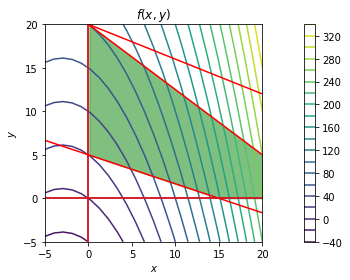

In [9]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
    return 0.5*x*x + 3*x + 4*y

#We evaluate the function on a meshgrid
x = np.linspace(-5, 20, 25)
y = np.linspace(-5, 20, 25)
X, Y = np.meshgrid(x, y)
F = f(X, Y)

#We find the contraining lines
x1 = np.linspace(-5, 20, 50)
y1 = (15-x1)/3
y2 = (100-2*x1)/5
y3 = (80-3*x1)/4
y4 = np.minimum(y2, 0)
y5 = np.maximum(y4, y1)

#Plotting
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
plt.contour(X, Y, F, 20)
plt.colorbar()
plt.axis('scaled')
plt.plot(x1,y1,x1,y2,x1,y3, color='red')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.fill_between(x1, y3, y5, where=x1>0, color='green', alpha='0.5')

We observe graphically that the minimum contour which fits the feasible region required (green region) reaches $[x,y] \approx [0,5]$. Hence, $f(x,y) \approx 20$ is the minimum value of the function which fits the constraints.

Check that the solution you've found agrees with your plot!   You should now be equipped to solve constrained quadratic optimisation problems.
<div style="text-align: right"><b>[5 marks]</b></div>

This agrees with the solution we have found, as the optimisation program using cvxopt finds $[x,y] = [7.13 \times 10^{-7}, 5]$ as our solution. This solution gives a primal objective of 20, as we expected. So these solutions are very close together.

# Part 3. Hard, large margin classifier

Given a linearly separable training data set `X` and `t`, write a function 

    sv, score = lmc(X, t, Xtest)

to construct a large margin classifier for the data and to classify the data in `Xtest`. 

Your function should construct and solve the Lagrangian dual function for a vector of $\alpha$s.  The non-zero $\alpha$ correspond the support vectors and your function should return a vector, `sv` of indices of the support vectors in `X` (or a Boolean array indicating the SVs).   Your function should also return a vector, `score`, of the signed distances of each `Xtest` from the optimal hyperplane. The signed distance is the distance from the hyperplane, with the sign specifying which side of the hyperplane the point is on.  It is easily calculated from $\mathbf{w}^T \mathbf{x} + b$.  

Note when classifying an observation $\mathbf{x}$ it is best not to calculate the coefficients $\mathbf{w}$ in order to calculate the discriminant function $\mathbf{w}^T \mathbf{x} + b$.  This is because later, when we use a kernel to map to higher dimensional spaces, $\mathbf{w}$ may be very high dimensional (possibly infinite dimensional).  Instead calculate the discriminant function from the $\mathbf{x}_n, t_n$ and $\alpha_n$.

<div style="text-align: right"><b>[10 marks]</b></div>

We impose the following conditions and solve for $\alpha$ using cvxopt:

\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{so, we require   }\min_{\balpha} & ~~ -\sum_n \alpha_n + \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}

We then find $w = \sum_{n\in sv} \alpha_n t_n x_n$, and the score (and classification) of each Xtest.

We then plot the margins and show how it classifies the training and test data respectively.

In [10]:
def lmc(X, t, Xtest):
    tr_samples=len(X)
    
    #We define the problem for solving in cvxopt and input it into the solver:
    G = matrix(-np.identity(tr_samples), tc='d')
    h = matrix(np.zeros(tr_samples), tc='d')
    A = matrix(t, (1,tr_samples), tc='d')
    b = matrix(0, tc='d')
    q = matrix(-np.ones(tr_samples), tc='d')
    P = matrix(t[:,None]*t[None,:]*np.inner(X,X), tc='d') #element wise matrix multiplication
    sol = solvers.qp(P, q, G, h, A, b)

    alphas = sol['x']
    bs = []
    sv = []
    
    #We find the support vectors
    for i in range(tr_samples):
        if alphas[i]>1e-5:
            sv.append(i)
    w = 0
    for ind in sv:
        w += alphas[ind]*t[ind]*X[ind]
    
    #We find b
    for ind in sv:
        b = t[ind]
        for ind2 in sv:
            b -= alphas[ind2]*t[ind2]*np.inner(X[ind2],X[ind])
        bs.append(b)
    b = np.mean(bs)
    
    #Calculating score:
    score = []
    for i in range(len(Xtest)):
        y = b
        for ind in sv:
            y += alphas[ind]*t[ind]*np.inner(X[ind],Xtest[i])
        score.append(y)
    
    #Finding the points where score crosses -1/0/1 and plotting figures:
    plt.figure()
    plt.plot(X[t==-1,0], X[t==-1,1], 'bo', label='Training data (t=-1)')
    plt.plot(X[t==1,0], X[t==1,1], 'ro', label='Training data (t=1)')
    for ind in sv:
        if t[ind]==1:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
        else:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)')           
    x = np.linspace(-4, 6, 50)
    y1=(-b-w[0]*x)/w[1]
    y2=(1-b-w[0]*x)/w[1]
    y3=(-1-b-w[0]*x)/w[1]
    plt.plot(x,y1,color='black', label='Discriminant')
    plt.plot(x,y2,color='red', label='Hyperplane (1)')
    plt.plot(x,y3,color='blue', label='Hyperplane (-1)')
    if np.amax(score)>1:
        plt.xlim(-2,6)
        plt.ylim(-2.5,5.5)
    else:
        plt.xlim(-3,5)
        plt.ylim(-2**32+2,2**32-2)
    plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
    plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5') 
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='lower right')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training Data')
    if np.amax(score)<0.5:
        plt.figure()
        plt.plot(X[t==-1,0], X[t==-1,1], 'bo', label='Training data (t=-1)')
        plt.plot(X[t==1,0], X[t==1,1], 'ro', label='Training data (t=1)')
        plt.plot(x,y1,color='black',label='Discriminant')
        plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
        plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5')
        plt.xlim(-3,5)
        plt.ylim(-3,5)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Training Data')
        for ind in sv:
            if t[ind]==1:
                plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
            else:
                plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)') 
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc='lower right')
    plt.figure() 
    plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
    plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5')
    plt.plot(x,y1,color='black', label='Discriminant')
    for ind in sv:
        if t[ind]==1:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
        else:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)')    
    if np.amax(score)>1:
        plt.plot(x,y2,color='red', label='Hyperplane (1)')
        plt.plot(x,y3,color='blue', label='Hyperplane (-1)')
        plt.xlim(-2,6)
        plt.ylim(-2.5,5.5) 
    else:
        plt.xlim(-3,5)
        plt.ylim(-3,5)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='lower right')
    plt.xlabel('X1')
    plt.ylabel('X2')
    return sv, score

Test your code on the following two-dimensional separable data.  Plot the data, the separating hyperplane and its margins, together with the support vectors.
<div style="text-align: right"><b>[5 marks]</b></div>

     pcost       dcost       gap    pres   dres
 0: -1.2613e+01 -2.4702e+01  2e+02  2e+01  2e+00
 1: -1.9420e+01 -1.5130e+01  1e+02  6e+00  7e-01
 2: -1.7782e+01 -6.0412e+00  4e+01  2e+00  2e-01
 3: -5.3134e-01 -2.3072e+00  2e+00  5e-15  1e-14
 4: -1.5984e+00 -2.1146e+00  5e-01  7e-16  4e-15
 5: -2.0153e+00 -2.0418e+00  3e-02  6e-16  4e-15
 6: -2.0382e+00 -2.0385e+00  3e-04  1e-15  4e-15
 7: -2.0384e+00 -2.0384e+00  3e-06  1e-15  4e-15
 8: -2.0384e+00 -2.0384e+00  3e-08  1e-15  5e-15
Optimal solution found.


Text(0, 0.5, 'X2')

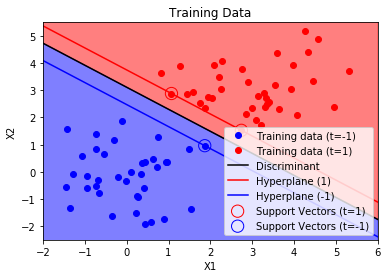

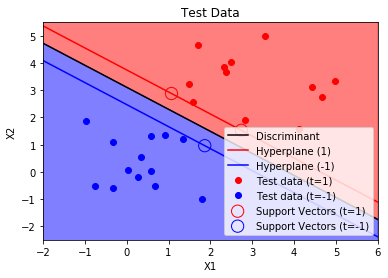

In [11]:
#We load in the data and split into training and test
separable = np.loadtxt('separable.txt')
X = separable[:,:2]
t = separable[:,2]
Xtr, Xte, ttr, tte = train_test_split(X,t, test_size=0.25)

#We run our function
lmc(Xtr, ttr, Xte)

#Plotting
plt.plot(Xte[tte==1,0], Xte[tte==1,1], 'ro', label='Test data (t=1)')
plt.plot(Xte[tte==-1,0], Xte[tte==-1,1], 'bo', label='Test data (t=-1)')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')
plt.title('Test Data')
plt.xlabel('X1')
plt.ylabel('X2')

We see that we find a division of the training data, such that the modulus of all scores are greater than or equal to 1 (that is all points lie on or outside the hyperplanes).

We observe that the classifier is very successful at classifying the test data.

What happens if the data are not separable?  Try it.

<div style="text-align: right"><b>[5 marks]</b></div>

     pcost       dcost       gap    pres   dres
 0: -2.6489e+01 -6.6458e+01  3e+02  2e+01  2e+00
 1: -1.0296e+02 -1.7491e+02  2e+02  1e+01  2e+00
 2: -4.6222e+02 -6.7755e+02  3e+02  9e+00  1e+00
 3: -9.3189e+02 -1.2411e+03  3e+02  8e+00  1e+00
 4: -2.7850e+03 -3.2633e+03  5e+02  7e+00  1e+00
 5: -1.2708e+04 -1.3750e+04  1e+03  7e+00  1e+00
 6: -5.9199e+04 -6.2705e+04  4e+03  6e+00  1e+00
 7: -4.9457e+05 -5.1179e+05  2e+04  6e+00  1e+00
 8: -1.1422e+07 -1.1523e+07  1e+05  6e+00  1e+00
 9: -1.2238e+09 -1.2245e+09  7e+05  6e+00  1e+00
10: -5.8718e+11 -5.8742e+11  2e+08  6e+00  1e+00
11: -5.9484e+11 -5.9509e+11  2e+08  6e+00  1e+00
12: -5.9485e+11 -5.9510e+11  2e+08  6e+00  1e+00
13: -5.9464e+11 -5.9489e+11  2e+08  6e+00  1e+00
14: -6.4818e+11 -6.4845e+11  3e+08  6e+00  1e+00
15: -6.4923e+11 -6.4949e+11  3e+08  6e+00  1e+00
16: -6.5025e+11 -6.5052e+11  3e+08  6e+00  1e+00
17: -1.7717e+12 -1.7723e+12  7e+08  6e+00  1e+00
18: -1.8783e+12 -1.8789e+12  6e+08  6e+00  1e+00
Terminated (singular 

Text(0.5, 1.0, 'Test Data')

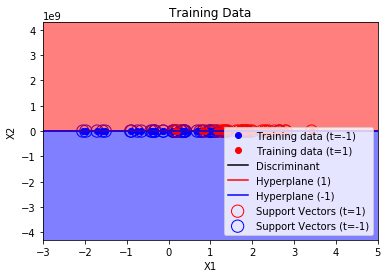

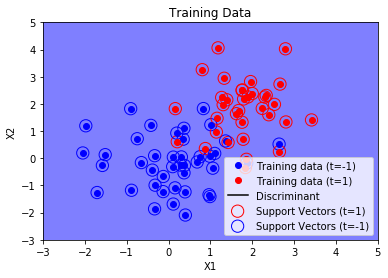

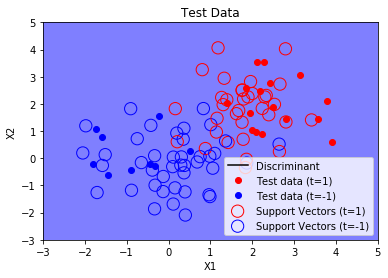

In [12]:
#We load in the data and split into training and test
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]
Xtr, Xte, ttr, tte = train_test_split(X,t, test_size=0.25)

#We run our function
lmc(Xtr, ttr, Xte)

#Plotting
plt.plot(Xte[tte==1,0], Xte[tte==1,1], 'ro', label='Test data (t=1)')
plt.plot(Xte[tte==-1,0], Xte[tte==-1,1], 'bo', label='Test data (t=-1)')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Data')

Here we observe that the classifier makes every training point a support vector and that the values of score are very low (we can't see the hyperplanes at 1 and -1). The hard, large margin classifier tends to classify all points the same (all as either t=1 or t=-1).

# Part 4. Soft, large margin classifier

Of course, most interesting data sets are not linearly separable.  Using your `lmc` function as a basis, write a new function:

    sv, score = lsvm(X, t, C, Xtest)

that implements a soft large margin classifier. The additional parameter `C` should specify the relative weight given to the emperical error versus the regularisation term.
<div style="text-align: right"><b>[10 marks]</b></div>

We impose the following conditions and solve for $\alpha$ using cvxopt:

\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{so, we require   }\min_{\balpha} & ~~ -\sum_n \alpha_n + \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & C \ge \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}

We then find $w = \sum_{n\in sv} \alpha_n t_n x_n$, and the score (and classification) of each Xtest.

We then plot the margins and show how it classifies the training and test data respectively.

In [13]:
def lsvm(X, t, C, Xtest):
    tr_samples=len(X)

    #We define the problem for solving in cvxopt and input it into the solver:
    G = matrix(np.vstack((-np.identity(tr_samples),np.identity(tr_samples))), tc='d')
    h = matrix(np.hstack((np.zeros(tr_samples), C*np.ones(tr_samples))), tc='d')
    A = matrix(t, (1,tr_samples), tc='d')
    b = matrix(0, tc='d')
    q = matrix(-np.ones(tr_samples), tc='d')
    P = matrix(t[:,None]*t[None,:]*np.inner(X,X), tc='d') #element wise matrix multiplication
    sol = solvers.qp(P, q, G, h, A, b)

    alphas = sol['x']
    bs = []
    sv = []
    
    #We find the support vectors
    for i in range(tr_samples):
        if alphas[i]>1e-5:
            sv.append(i)
    
    #We find w
    w = 0
    for ind in sv:
        w += alphas[ind]*t[ind]*X[ind]

    #We find b
    for ind in sv:
        b = t[ind]
        for ind2 in sv:
            b -= alphas[ind2]*t[ind2]*np.inner(X[ind2],X[ind])
        bs.append(b)
    b = np.mean(bs)

    #Calculating score:
    score = []
    for i in range(len(Xtest)):
        y = b
        for ind in sv:
            y += alphas[ind]*t[ind]*np.inner(X[ind],Xtest[i])
        score.append(y)
    
    #Finding the points where score crosses -1/0/1 and plotting figures:
    x = np.linspace(-3, 5, 50)
    plt.figure()
    y1=(-b-w[0]*x)/w[1]
    y2=(1-b-w[0]*x)/w[1]
    y3=(-1-b-w[0]*x)/w[1]
    plt.plot(x,y1,color='black', label='Discriminant')
    plt.plot(x,y2,color='red', label='Hyperplane (1)')
    plt.plot(x,y3,color='blue', label='Hyperplane (-1)')
    
    def a(x,y):
        return y*w[1]+b+w[0]*x
    y = np.linspace(-3, 6, 50)
    X1, Y1 = np.meshgrid(x, y)
    a = a(X1, Y1)
    plt.contour(X1, Y1, a, np.arange(-11,12,2))
    plt.colorbar()

    
    plt.plot(X[t==-1,0], X[t==-1,1], 'bo', label='Training data (t=-1)')
    plt.plot(X[t==1,0], X[t==1,1], 'ro', label='Training data (t=1)')
    plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
    plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5')
    for ind in sv:
        if t[ind]==1:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
        else:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)')  
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left')
    plt.xlim(-2.3,4.1)
    plt.ylim(-2.5,5)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training Data')
  
    #Predictions figure:
    plt.figure()
    plt.plot(x,y1,color='black', label='Discriminant')
    plt.plot(x,y2,color='red', label='Hyperplane (1)')
    plt.plot(x,y3,color='blue', label='Hyperplane (-1)')
    plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
    plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5') 
    plt.xlim(-2.3,4.1)
    plt.ylim(-2.5,5)
    for ind in sv:
        if t[ind]==1:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
        else:
            plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)') 
    for i in range(len(score)):
        if score[i]<0:
            plt.plot(Xte[i,0], Xte[i,1], 'bo')
        else:
            plt.plot(Xte[i,0], Xte[i,1], 'ro')
    return sv, score, w

Test your function on the following simple data set.   These data are drawn from two isotropic Gaussian distributions centred at $(0, 0)$ and $(2, 2)$, so the optimal separating hyperplane, in the limit of a large amount of data, is the perpendicular bisector of the line joining the centres.  As before, plot the separating hyperplane and the support vectors and make a contour plot of the score across the domain.
<div style="text-align: right"><b>[5 marks]</b></div>

     pcost       dcost       gap    pres   dres
 0: -1.9555e+01 -1.4740e+02  7e+02  2e+00  2e-15
 1: -1.2830e+01 -8.3285e+01  1e+02  3e-01  2e-15
 2: -9.6078e+00 -2.1675e+01  2e+01  3e-02  4e-15
 3: -1.0648e+01 -1.2999e+01  3e+00  4e-03  1e-15
 4: -1.1081e+01 -1.1912e+01  9e-01  1e-03  1e-15
 5: -1.1217e+01 -1.1717e+01  5e-01  4e-04  1e-15
 6: -1.1356e+01 -1.1500e+01  1e-01  8e-05  1e-15
 7: -1.1395e+01 -1.1453e+01  6e-02  2e-05  1e-15
 8: -1.1417e+01 -1.1425e+01  8e-03  2e-06  2e-15
 9: -1.1420e+01 -1.1421e+01  3e-04  4e-08  2e-15
10: -1.1421e+01 -1.1421e+01  3e-06  4e-10  1e-15
Optimal solution found.


Text(0.5, 1.0, 'Test Data')

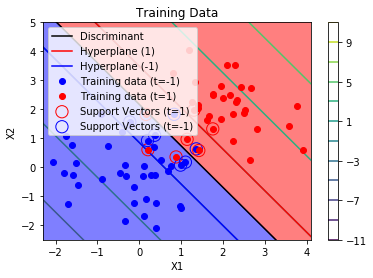

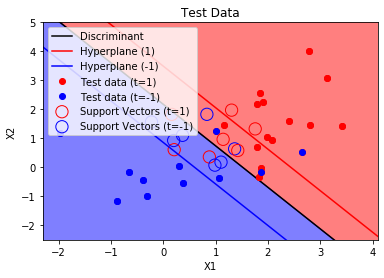

In [14]:
#We load in the data and split into training and test
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]
Xtr, Xte, ttr, tte = train_test_split(X,t, test_size=0.25)

#We run our function with C=1
lsvm(Xtr, ttr, 1, Xte)

#Plotting
plt.plot(Xte[tte==1,0], Xte[tte==1,1], 'ro', label='Test data (t=1)')
plt.plot(Xte[tte==-1,0], Xte[tte==-1,1], 'bo', label='Test data (t=-1)')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Data')

Here, we observe that a soft margin SVM is quite effective at classifying the test data. We also note that we have a larger quantity of support vectors than in the hard margin case. 

How does the width of the margin vary with `C`?  Explain why.
<div style="text-align: right"><b>[5 marks]</b></div>

In [15]:
%%capture
#We split into training and test
X = nonseparable[:,:2]
t = nonseparable[:,2]
Xtr, Xte, ttr, tte = train_test_split(X,t, test_size=0.25)

#We run our function with variab
Cs = 10.0**np.arange(-2,4)
margin_widths=[]

for C in Cs:       #We iterate through Cs to find the best combination
    sv, score, w = lsvm(Xtr, ttr, C, Xte)
    #We calculate w:
    margin_widths.append(2/np.linalg.norm(w))

Text(0.5, 1.0, 'Margin width vs. C')

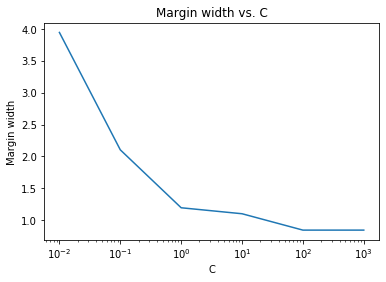

In [16]:
plt.figure()
plt.plot(Cs,margin_widths)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Margin width')
plt.title('Margin width vs. C') 

As $C$ increases, the margin width decreases. This is as we would expect, as $C$ is a regularisation
parameter which trades off quality of fit to data with width of margin. Large $C$s punish datapoints being a large distance from their respective margins harshly, so this relationship is expected- as smaller margins mean less slack variables, although they will be punished more harshly. 

This relationship also can also be explained by $w$ increasing as $C$ increases. The margin width is given by $\frac{2}{ \left\lVert w\right\rVert}$, so as $w$ is dependent on (and increases with) $\alpha_n$, and $C \ge \alpha_n \ge 0$. It is logical that as $C$ increases, $\alpha_n$'s are allowed to increase, so $w$ increases, and hence the margin width decreases.

# Part 5. Nonlinear SVM

Finally, using your `lsvm` code as a basis, write a new function to implement a fully nonlinear SVM with a user-specfied kernel function.   Your code should have the signature:

    sv, score = svm(X, t, C, kernel, Xtest)
    
where the `X`, `t`, `C` and `Xtest` are as before and `kernel` is a function that evaluates a kernel and can be called by your svm to evaluate the similarity of any pair of vectors:

    ip = kernel(x, y)     # inner product in some high-dimensional space

For example, the following cell implements an RBF kernel function

<div style="text-align: right"><b>[10 marks]</b></div>

We define some possible kernels (rbf, linear, and polynomial).

We impose the following conditions and solve for $\alpha$ using cvxopt:

\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\phi(\bx_n), \phi(\bx_m)\rangle\\
        \text{so, we require   }\min_{\balpha} & ~~ -\sum_n \alpha_n + \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\phi(\bx_n), \phi(\bx_m)\rangle\\
        \text{such that   }\quad & C \ge \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}

We then find $w = \sum_{n\in sv} \alpha_n t_n x_n$, and the score (and classification) of each Xtest.

We then plot the margins and show how it classifies the training and test data respectively.

In [17]:
def find_score(b,sv,t,X,Xtest,alphas,kernel,par):           #Function for finding score
    if kernel==rbf:
        y = 0
    else:
        y = b         
    for ind in sv:
        if kernel==linear:
            y += alphas[ind]*t[ind]*kernel(X[ind],Xtest)
        else:
            y += alphas[ind]*t[ind]*kernel(X[ind],Xtest,par)
    return y

def rbf(x, y, gamma):
    """RBF kernel with precision gamma.""" 
    d = x-y
    return np.exp(-gamma*np.dot(d, d))

def linear(x, y):
    """Linear kernel"""
    return np.dot(x, y)

def polynomial(x, y, r):
    """Polynomial kernel"""
    return (1+np.dot(x,y))**r
    
def svm(X, t, C, kernel, Xtest, plot='on',gamma=1,r=1):
    tr_samples=len(X)

    #We define the problem for solving in cvxopt and input it into the solver:
    G = matrix(np.vstack((-np.identity(tr_samples),np.identity(tr_samples))), tc='d')
    h = matrix(np.hstack((np.zeros(tr_samples), C*np.ones(tr_samples))), tc='d')
    A = matrix(t, (1,tr_samples), tc='d')
    b = matrix(0, tc='d')
    q = matrix(-np.ones(tr_samples), tc='d')
    K=np.zeros((tr_samples,tr_samples))
    for i in range(tr_samples):    #Setting up our grid of kernels for use
        for j in range(tr_samples):
            if kernel==rbf:
                K[i,j] = kernel(X[i], X[j],gamma)
                extraparam=gamma
            elif kernel==polynomial:
                K[i,j] = kernel(X[i], X[j],r)
                extraparam=r
            else:
                K[i,j] = kernel(X[i], X[j])
                extraparam=0
                
    P = matrix(t[:,None]*t[None,:]*K, tc='d') #element wise matrix multiplication
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = sol['x']
    sv = []
    
    #Finding support vectors
    for i in range(tr_samples):
        if alphas[i]>1e-5:
            sv.append(i)
            
    #Finding b
    bs = []
    for ind in sv:
        b = t[ind]
        for ind2 in sv:
            b -= alphas[ind2]*t[ind2]*K[ind,ind2]
        bs.append(b)
    b = np.mean(bs)
    if kernel==linear:
        w = 0
        for ind in sv:
            w += alphas[ind]*t[ind]*X[ind]   

    #Calculating score:
    score = []
    for i in range(len(Xtest)):
        y = find_score(b,sv,t,X,Xtest[i],alphas,kernel,extraparam)
        score.append(y)
    
    #Finding the points where score crosses -1/0/1 and plotting figures:    x = np.linspace(-3, 5, 50)
    if plot=='on':
        plt.figure()
        plt.plot(X[t==-1,0], X[t==-1,1], 'bo', label='Training data (t=-1)')
        plt.plot(X[t==1,0], X[t==1,1], 'ro', label='Training data (t=1)')
        for ind in sv:
            if t[ind]==1:
                plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
            else:
                plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)') 
        if kernel==linear:
            x = np.linspace(-3, 5, 50)
            y1=(-b-w[0]*x)/w[1]
            y2=(1-b-w[0]*x)/w[1]
            y3=(-1-b-w[0]*x)/w[1]
            plt.plot(x,y1,color='black', label='Discriminant')
            plt.plot(x,y2,color='red', label='Hyperplane (1)')
            plt.plot(x,y3,color='blue', label='Hyperplane (-1)')
            plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
            plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5') 
        else:
            x=np.linspace(-6,6,100)
            y=np.linspace(-6,6,100)
            X1, X2 = np.meshgrid(x, y)
            X_mesh = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
            Z=np.zeros((100,100))
            counter=0
            for j in range(100):
                for i in range(100):
                    Z[i][j] = find_score(b,sv,t,X,X_mesh[counter],alphas,kernel,extraparam)
                    counter += 1
            plt.contour(X1, X2, Z, [0], colors='black', linewidths=1, origin='lower')
            plt.contour(X1, X2, Z + 1, [0], colors='blue', linewidths=1, origin='lower')
            plt.contour(X1, X2, Z - 1, [0], colors='red', linewidths=1, origin='lower')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc='upper left')
        plt.xlim(-2.3,4.1)
        plt.ylim(-2.5,5)               
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Training Data')
        #Predictions figure:
        plt.figure()
        for i in range(len(score)):
            if score[i]<0:
                plt.plot(Xte[i,0], Xte[i,1], 'bo')
            else:
                plt.plot(Xte[i,0], Xte[i,1], 'ro')   
        if kernel==linear:
            x = np.linspace(-3, 5, 50)
            plt.plot(x,y1,color='black', label='Discriminant')
            plt.plot(x,y2,color='red', label='Hyperplane (1)')
            plt.plot(x,y3,color='blue', label='Hyperplane (-1)')
            plt.fill_between(x, y1, y2=2**32-1, color='red', alpha='0.5')    
            plt.fill_between(x, y1, y2=-2**32-1, color='blue', alpha='0.5') 
        else:
            X1, X2 = np.meshgrid(x, y)
            mesh = np.array([[x, y] for x, y in zip(np.ravel(X1), np.ravel(X2))])
            Z=np.zeros((100,100))
            counter=0
            for j in range(100):
                for i in range(100):
                    Z[i][j] = find_score(b,sv,t,X,mesh[counter],alphas,kernel,extraparam)
                    counter += 1
            plt.contour(X1, X2, Z, [0], colors='black', linewidths=1, origin='lower')
            plt.contour(X1, X2, Z + 1, [0], colors='blue', linewidths=1, origin='lower')
            plt.contour(X1, X2, Z - 1, [0], colors='red', linewidths=1, origin='lower')
            for ind in sv:
                if t[ind]==1:
                    plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='red', label='Support Vectors (t=1)')
                else:
                    plt.scatter(X[ind, 0],X[ind, 1], s=150, facecolors='none', edgecolors='blue', label='Support Vectors (t=-1)') 
            plt.xlim(-2.3,4.1)
    return sv, score, alphas, b

Test your code on the non-separable data above using a linear kernel, the RBF kernel and the polynomial kernel.  You will need to use cross-validation to choose the best parameters and it is fine to use the `scikit` cross validation and grid search machinery rather than writing your own.

<div style="text-align: right"><b>[5 marks]</b></div>

## RBF Kernel

In [18]:
%%capture
a=randint(0, 2**31)
X = nonseparable[:,:2]
t = nonseparable[:,2]
Xtr, Xte, ttr, tte = train_test_split(X,t, test_size=0.25, random_state=a)
max_validation_score = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold
gammas = 10.0**np.arange(-2,3)
Cs = 10.0**np.arange(-2,4)
for C in Cs:
    for gamma in gammas:    #We iterate through Cs and gammas to find the best combination
        validation_score = 0
        for train, validation in kfold.split(Xtr):
            sv, score, alphas, b = svm(Xtr[train], ttr[train], C, rbf, Xtr[validation], plot='off', gamma=gamma)
            a = 0
            for i in range(len(ttr[validation])):
                if np.sign(score[i])==ttr[validation][i]:
                    a += 1
            validation_score += a/len(ttr[validation])  
        mean_validation_score = validation_score/5      #We find the best mean validation score across all folds
        if mean_validation_score > max_validation_score:
            max_validation_score = mean_validation_score
            best_gamma = gamma
            best_C = C
best_C_rbf = best_C

Best performance on the validation sets is with gamma = 0.010000 and C = 0.010000 
	- the mean classification score = 0.960000
     pcost       dcost       gap    pres   dres
 0: -1.5774e+01 -4.6459e+00  4e+02  2e+01  5e-16
 1: -4.7649e+00 -2.2902e+00  3e+01  2e+00  6e-16
 2: -6.1186e-01 -1.5979e+00  1e+00  2e-16  2e-15
 3: -6.8991e-01 -7.7507e-01  9e-02  2e-17  7e-16
 4: -7.2866e-01 -7.4006e-01  1e-02  2e-17  5e-16
 5: -7.2908e-01 -7.2999e-01  9e-04  3e-17  4e-16
 6: -7.2939e-01 -7.2977e-01  4e-04  2e-17  4e-16
 7: -7.2949e-01 -7.2955e-01  6e-05  3e-17  5e-16
 8: -7.2951e-01 -7.2953e-01  3e-05  3e-17  4e-16
 9: -7.2952e-01 -7.2952e-01  4e-07  2e-17  6e-16
Optimal solution found.


C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: UserWarning: No contour levels were found within the data range.
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: No contour levels were found within the data range.
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:143: UserWarning: No contour levels were found within the data range.
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:144: UserWarning: No contour levels were found within the data range.


Text(0.5, 1.0, 'Test Data')

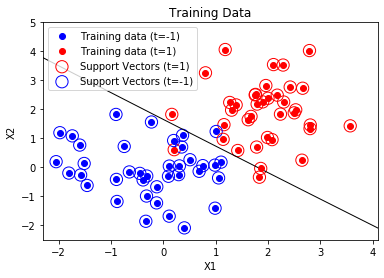

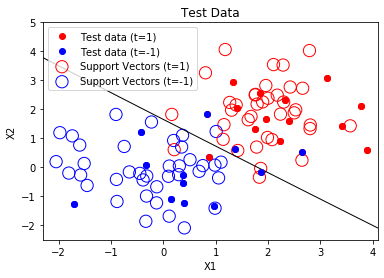

In [19]:
print('Best performance on the validation sets is with gamma = %f and C = %f \n\t- the mean classification score = %f'  %(best_gamma, best_C_rbf,max_validation_score))

# We then retrain using all data and best C and gamma:

sv, score, alphas, b = svm(Xtr, ttr, best_C, rbf, Xte, plot='on', gamma=best_gamma)
plt.xlim(-2.3,4.1)
plt.ylim(-2.5,5)
plt.plot(Xte[tte==1,0], Xte[tte==1,1], 'ro', label='Test data (t=1)')
plt.plot(Xte[tte==-1,0], Xte[tte==-1,1], 'bo', label='Test data (t=-1)')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Data')

## Linear Kernel

In [20]:
%%capture
a=randint(0, 2**31)
max_validation_score = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold
Cs = 10.0**np.arange(-2,4)

for C in Cs:  #We iterate through Cs to find the best C
    validation_score = 0
    for train, validation in kfold.split(Xtr):
        sv, score, alphas, b = svm(Xtr[train], ttr[train], C, linear, Xtr[validation], plot='off')
        a = 0
        for i in range(len(ttr[validation])):
            if np.sign(score[i])==ttr[validation][i]:
                a += 1
        validation_score += a/len(ttr[validation])
    mean_validation_score = validation_score/5      #We find the best mean validation score across all folds
    if mean_validation_score > max_validation_score:
        max_validation_score = mean_validation_score
        best_C = C
best_C_linear = best_C

Best performance on the validation sets is with C = 10.000000 
	- the mean classification score = 0.960000
     pcost       dcost       gap    pres   dres
 0: -9.2309e+01 -4.7644e+03  1e+04  7e-01  1e-14
 1: -4.3440e+01 -1.1676e+03  2e+03  6e-02  1e-14
 2: -3.7853e+01 -2.2684e+02  2e+02  6e-03  2e-14
 3: -5.9280e+01 -1.2230e+02  7e+01  2e-03  1e-14
 4: -6.7506e+01 -9.2947e+01  3e+01  6e-04  1e-14
 5: -7.2650e+01 -8.8415e+01  2e+01  3e-04  1e-14
 6: -7.6875e+01 -8.2459e+01  6e+00  8e-05  1e-14
 7: -7.6604e+01 -8.1393e+01  5e+00  4e-05  1e-14
 8: -7.8121e+01 -7.9654e+01  2e+00  2e-06  8e-15
 9: -7.8769e+01 -7.8843e+01  7e-02  1e-07  1e-14
10: -7.8804e+01 -7.8805e+01  1e-03  1e-09  9e-15
11: -7.8804e+01 -7.8804e+01  1e-05  1e-11  1e-14
Optimal solution found.


Text(0.5, 1.0, 'Test Data')

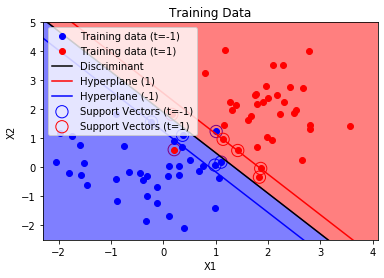

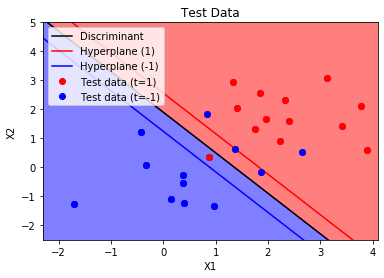

In [21]:
print('Best performance on the validation sets is with C = %f \n\t- the mean classification score = %f'  %(best_C_linear,max_validation_score))

# We then retrain using all data and best C:

sv, score, alphas, b = svm(Xtr, ttr, best_C, linear, Xte, plot='on')
plt.xlim(-2.3,4.1)
plt.ylim(-2.5,5)
plt.plot(Xte[tte==1,0], Xte[tte==1,1], 'ro', label='Test data (t=1)')
plt.plot(Xte[tte==-1,0], Xte[tte==-1,1], 'bo', label='Test data (t=-1)')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Data')

## Polynomial Kernel

In [22]:
%%capture
a=randint(0, 2**31)
max_validation_score = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold
rs = np.arange(1,5)
Cs = 10.0**np.arange(-2,4)

for C in Cs:       #We iterate through Cs and rs to find the best combination
    for r in rs:
        validation_score = 0
        for train, validation in kfold.split(Xtr):
            sv, score, alphas, b = svm(Xtr[train], ttr[train], C, polynomial, Xtr[validation], plot='off', r=r)
            a = 0
            for i in range(len(ttr[validation])):
                if np.sign(score[i])==ttr[validation][i]:
                    a += 1
            validation_score += a/len(ttr[validation])
        mean_validation_score = validation_score/5      #We find the best mean validation score across all folds
        if mean_validation_score > max_validation_score:
            max_validation_score = mean_validation_score
            best_r = r
            best_C = C
best_C_polynomial = best_C

Best performance on the validation sets is with r = 1 and C = 0.010000 
	- the mean classification score = 0.960000
     pcost       dcost       gap    pres   dres
 0: -9.7748e+00 -1.4819e+00  4e+02  2e+01  1e-15
 1: -3.6971e-01 -1.4744e+00  5e+00  2e-01  1e-15
 2: -2.8782e-01 -9.7484e-01  7e-01  3e-17  4e-16
 3: -3.2918e-01 -4.0635e-01  8e-02  1e-17  5e-16
 4: -3.6470e-01 -3.7754e-01  1e-02  2e-17  3e-16
 5: -3.7095e-01 -3.7352e-01  3e-03  2e-17  3e-16
 6: -3.7220e-01 -3.7271e-01  5e-04  2e-17  3e-16
 7: -3.7247e-01 -3.7252e-01  5e-05  2e-17  3e-16
 8: -3.7249e-01 -3.7249e-01  9e-07  2e-17  4e-16
 9: -3.7249e-01 -3.7249e-01  9e-09  2e-17  3e-16
Optimal solution found.


Text(0.5, 1.0, 'Test Data')

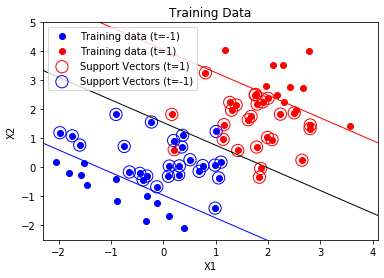

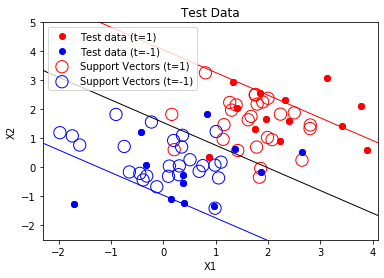

In [23]:
print('Best performance on the validation sets is with r = %i and C = %f \n\t- the mean classification score = %f'  %(best_r, best_C_polynomial,max_validation_score))

# We then retrain using all data and best C and r:
sv, score, alphas, b = svm(Xtr, ttr, best_C, polynomial, Xte, plot='on', r=best_r)
plt.xlim(-2.3,4.1)
plt.ylim(-2.5,5)
plt.plot(Xte[tte==1,0], Xte[tte==1,1], 'ro', label='Test data (t=1)')
plt.plot(Xte[tte==-1,0], Xte[tte==-1,1], 'bo', label='Test data (t=-1)')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Data')

We see that all of the kernels are quite accurate at classifying the training and test data for this dataset.

It is worth noting that sometimes the optimum kernel will be close to linear (in the limit of data points tending to infinity the optimum separating hyperplane is a perpendicular bisector of the line joining the centres of the 2 Gaussian distributions). Hence, all the kernels above will sometimes look similar (if $\gamma=0.01$, the rbf kernel is near linear and if $r=1$, the rbf kernel is near linear). If we had data that was distributed differently, for example if a certain target was more likely in a given radius from a point, then we would expect the linear kernel to perform worse than the other kernels.

Also sometimes the margins are not shown, if $C$ is small ($\approx 0.01$) the scores in the region near the points are small, so often the margins at score = $\pm1$ fall outside of the plot.

## Regularisation

Using the non-separable data, plot the regularisation term $\|\mathbf{w}\|^2$ (you may need to modify your function above to return the $\alpha$ values) and the empirical error for a range of $C$ and so visualise the trade-off between regularisation and empirical error. Use an appropriate logarithmically spaced range for $C$.

<div style="text-align: right"><b>[10 marks]</b></div>

In [24]:
%%capture
def regularisation(alphas,sv,t,X):      #Function to find w
    w = 0
    for ind in sv:
        w += alphas[ind]*t[ind]*X[ind]   
    return w

def empirical_error(w,alphas,b,sv,t,X,kernel,extrapar):     #Function to find empirical error (distance from corresponding margin)
    errors=0
    for i in range(len(X)):
        if find_score(b,sv,t,X,X[i],alphas,kernel,extrapar)*t[i]<1:
            if t[i]==1:
                errors += 1-find_score(b,sv,t,X,X[i],alphas,kernel,extrapar)
            else:
                errors += find_score(b,sv,t,X,X[i],alphas,kernel,extrapar)+1
    return errors

Cs = 10.0**np.arange(-4,4)
lin_reg = []
pol_reg = [] 
rbf_reg = []
lin_emp = []
pol_emp = []
rbf_emp = []

for C in Cs:
    sv, score, alphas, b = svm(Xtr, ttr, C, rbf, Xte, plot='off', gamma=best_gamma)
    w=regularisation(alphas,sv,ttr,Xtr)
    norm_squared=(np.linalg.norm(w))**2                       #The regularisation term is the norm of w squared.
    rbf_reg.append(norm_squared)
    rbf_emp.append(empirical_error(w,alphas,b,sv,ttr,Xtr,rbf,best_gamma))
    
    sv, score, alphas, b = svm(Xtr, ttr, C, linear, Xte, plot='off')
    w=regularisation(alphas,sv,ttr,Xtr)
    norm_squared=(np.linalg.norm(w))**2 
    lin_reg.append(norm_squared)
    lin_emp.append(empirical_error(w,alphas,b,sv,ttr,Xtr,linear,0))
    
    
    sv, score, alphas, b = svm(Xtr, ttr, C, polynomial, Xte, plot='off', r=best_r)
    w=regularisation(alphas,sv,ttr,Xtr)
    norm_squared=(np.linalg.norm(w))**2
    pol_reg.append(norm_squared)
    pol_emp.append(empirical_error(w,alphas,b,sv,ttr,Xtr,polynomial,best_r)) 

Text(0.5, 1.0, 'Polynomial Kernel: Empirical error vs C')

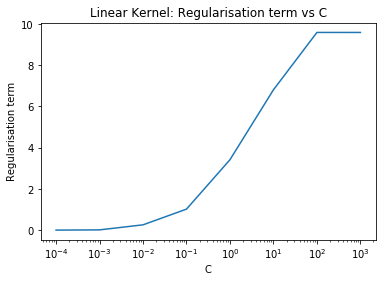

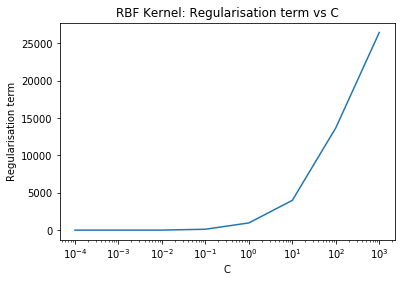

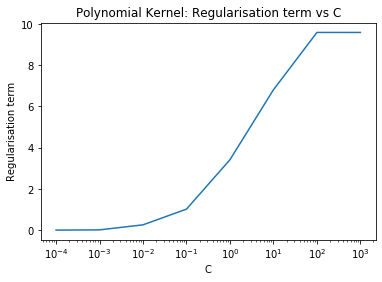

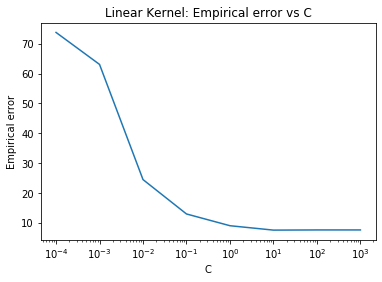

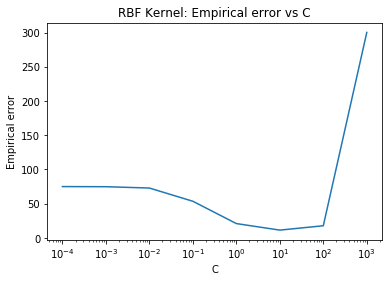

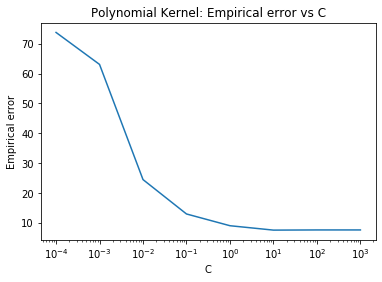

In [25]:
#Plotting
plt.figure()
plt.plot(Cs,lin_reg)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Regularisation term')
plt.title('Linear Kernel: Regularisation term vs C') 


plt.figure()
plt.plot(Cs,rbf_reg)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Regularisation term')
plt.title('RBF Kernel: Regularisation term vs C') 

plt.figure()
plt.plot(Cs,pol_reg)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Regularisation term')
plt.title('Polynomial Kernel: Regularisation term vs C') 


plt.figure()
plt.plot(Cs,lin_emp)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Empirical error')
plt.title('Linear Kernel: Empirical error vs C') 

plt.figure()
plt.plot(Cs,rbf_emp)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Empirical error')
plt.title('RBF Kernel: Empirical error vs C') 

plt.figure()
plt.plot(Cs,pol_emp)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Empirical error')
plt.title('Polynomial Kernel: Empirical error vs C') 

The shapes of the graphs we observe are similar for all kernels.

We observe that the regularisation term tends to increase with an increasing $C$. This may be because $w$ is dependent on (and increases with) $\alpha_n$, and $C \ge \alpha_n \ge 0$. It is logical that as $C$ increases, $\alpha_n$'s are allowed to increase, so $w$ increases, and hence the regularisation term $\|\mathbf{w}\|^2$ increases.

We observe that the empirical error tends to decrease with an increasing $C$.

With extremely an small $C$, the scores of all training examples are $\approx 0$, as all examples are much closer to the the discriminant function, in comparison to the margins. Hence, it follows that the empirical error in the limit of $C\rightarrow 0$ is the number of training examples (75 in our case). As $C$ is increased from 0, the empirical error should decrease, as we observe in our graphs. However, in the limit of $C\rightarrow \infty$, we know that the SVM is unregularised (has a hard margin). So, if there are any points on the wrong side of this hard margin (which by definition there will be if the data is not linearly separable), the empirical error also becomes $\infty$. Hence, as $C$ increases further, we expect that the empirical error will increase. We start to observe this in the case of the rbf kernel in some training-test splits of the data.